In [3]:
pip install matplotlib

In [4]:
pip install pandas

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
sample_data = {
    'Category': ['Start', 'Sales', 'Returns', 'Marketing', 'R&D', 'End'],
    'Amount': [800, 500, -50, -200, -100, 950]
}
df = pd.DataFrame(sample_data)

In [18]:
# Calculating the running totals
df['Running_Total'] = df['Amount'].cumsum()
df['Shifted_Total'] = df['Running_Total'].shift(1).fillna(0)
df['Position'] = df.apply(lambda row: row['Shifted_Total'] if row['Amount'] >= 0 else row['Running_Total'], axis=1)

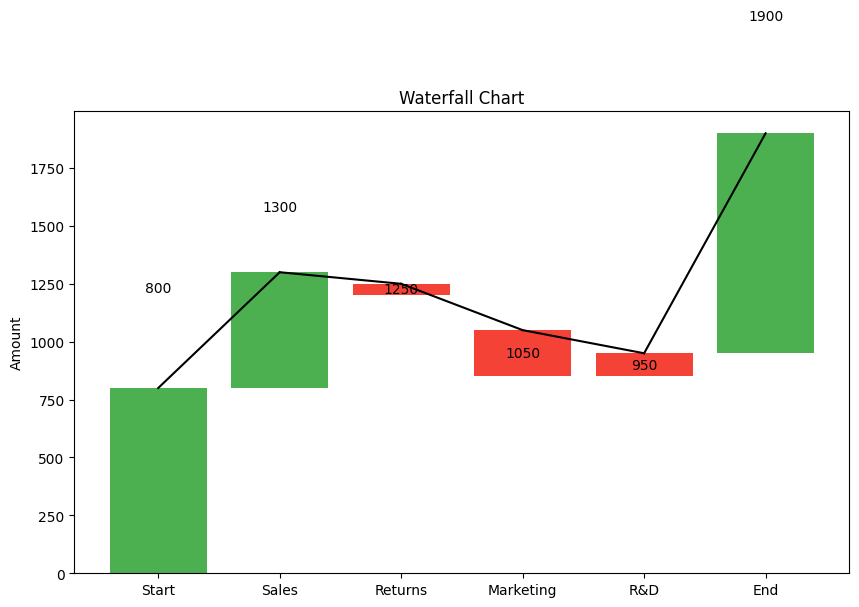

In [21]:
# plotting the waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))

# code for Bars
ax.bar(df['Category'], df['Amount'], bottom=df['Position'], color=['#4CAF50' if x >= 0 else '#F44336' for x in df['Amount']])

# code for lines to connect the bars
for i in range(1, len(df)):
    ax.plot([i-1, i], [df['Running_Total'][i-1], df['Running_Total'][i]], color='black')

# Adding the total labels
for i, (total, amount) in enumerate(zip(df['Running_Total'], df['Amount'])):
    ax.text(i, total + (amount / 2), f'{total:.0f}', ha='center', va='bottom' if amount > 0 else 'center')

ax.set_title('Waterfall Chart')
ax.set_ylabel('Amount')
plt.show()

2nd Format Water Fall chart

In [22]:
pip install plotly

In [24]:
import plotly.graph_objects as go
x = ["Sales", "Consulting", "Net Revenue", "Purchases", "Other Expenses", "Profit Before Tax"]
y = [60, 80, 0, -40, -20, 0]

In [25]:
fig = go.Figure(go.Waterfall(
    name="20",
    orientation="v",
    measure=["relative", "relative", "total", "relative", "relative", "total"],
    x=x,
    y=y,
    textposition="outside",
    text=["+60", "+80", "", "-40", "-20", "Total"],
    connector={"line":{"color":"rgb(63, 63, 63)"}}
))

fig.update_layout(title="Profit and Loss Statement 2018", showlegend=True)
fig.show()